# GATHERING 

In [151]:
#code for gathering twitter-archive data
import pandas as pd
df_csv=pd.read_csv('twitter-archive-enhanced.csv')
df_csv

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [152]:
#code for creating a .tsv file from url for a purticular url
import requests 
import sys,os
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response=requests.get(url)
print(response)
folder_name=os.getcwd()+'predictions'
if not os.path.exists(folder_name):
    os.mkdir(folder_name)
with open(os.path.join(folder_name,url.split('/')[-1]),mode='wb')as file:
    file.write(response.content)
with open('image-predictions.tsv',mode='wb')as f:
    f.write(response.content)
    

<Response [200]>


In [153]:
#code for gathering tweet_json data 
import os,sys
import requests

url="https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt"
response=requests.get(url)

with open('tweet-json.txt',mode='wb')as file:
    file.write(response.content)
    
tweet_list=[]
tweet_file=open('tweet-json.txt','r')
print(tweet_file.read())
for line in tweet_file:
    try:
        tweet_json=json.loads(line)
        tweet_list.append(tweet_json)
    except:
        continue
print(tweet_list)

#Add variables to tweet_info dataframe tweet ID, retweet count, favorite count
tweet_info=pd.DataFrame()
tweet_info['tweet_id']=list(map(lambda tweet:tweet['id'],tweet_list))
tweet_info['retweet_count']=list(map(lambda tweet:tweet['retweet_count'],tweet_list))
tweet_info['favorite_count']=list(map(lambda tweet:tweet['favorite_count'],tweet_list))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [154]:
# read .tsv file using pandas 
import pandas as pd
df_tsv=pd.read_csv(folder_name+'/'+'image-predictions.tsv',sep='\t')
df_tsv   

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


# VISUAL ASSESSMENT 


In [155]:
#Display twitter_archive dataset for visual assessment 
df_csv

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [156]:
#Display image prediction dataset for visual assessment
df_tsv

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [157]:
#Display dataset with retweet & favourite values for visual assessment
tweet_info

,tweet_id,retweet_count,favorite_count


### from this visual accessment itself we can see that there is some dirty and messy values in these datasets.we need clean this.

* The retweet colums can be deleted ,not requited 
* Null values are represented with Nan make it as None
* In df_csv gather all 4 dog stages (doggo, puppo, pupper, floofer) into one column 'dog_stage'
* deniminator colum does not having value 10 in all cells 



In [158]:
#check is there any tweet_id duplicationin df-tsv table 
df_tsv['tweet_id'].value_counts()
df_tsv[df_tsv.tweet_id.duplicated()]
#thare no duplication in tweet_id



,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [159]:
#for checking in df_tsv has any image which is having all the predictions are false.
df_tsv[(df_tsv.p1_dog==False) & (df_tsv.p2_dog==False) & (df_tsv.p3_dog==False)].count()
#there is 324 raws in this df_tsv which didnt got any predictions 

tweet_id    324
jpg_url     324
img_num     324
p1          324
p1_conf     324
p1_dog      324
p2          324
p2_conf     324
p2_dog      324
p3          324
p3_conf     324
p3_dog      324
dtype: int64

In [160]:
#for checking is there any tweets having images more than 4
df_tsv.img_num.value_counts()
# there is no data grater than 4.ie, none of the images are more than 4

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [161]:
#For twitter archive access
df_csv.info()
#there are a lot of missing values. in_reply_to_status_id & in_reply_to_user_id 
#does not have the count 2356. As in the description there is no retweet data needed
#so that we can delete those 3 colums related to retweet .
#data types also have to chenge for some columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [162]:
#for checking the duplicate value. Luckly there is no duplication in df_csv tweet_id
df_csv[df_csv.tweet_id.duplicated()]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [163]:
#check whether there any null values in tweet_id
print(df_csv[df_csv['tweet_id'].isnull()])


Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []


In [164]:
#check duplicates in tweet name
df_csv[df_csv.name.duplicated()].name
#duplicates are here aswell as null values 

7         None
12        None
23      Canela
24        None
25        None
30        None
32        None
35        None
37        None
41        None
42        None
47        None
55        None
59        None
60       Bella
62        None
64        None
72        None
75      Shadow
76        Emmy
78        None
83        None
88        None
89        None
93        None
96        None
98      Sierra
99        None
100       None
101       None
         ...  
2326     quite
2327         a
2328      None
2329      None
2330      None
2331      None
2332      None
2333        an
2334         a
2335        an
2336      None
2337      None
2338      None
2339      None
2340      None
2341      None
2342      None
2343      None
2344      None
2345       the
2346       the
2347         a
2348         a
2349        an
2350         a
2351      None
2352         a
2353         a
2354         a
2355      None
Name: name, Length: 1399, dtype: object

In [165]:
#for finding value counts of rating_numerator
df_csv.rating_numerator.value_counts()
df_csv[df_csv.rating_numerator > 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [166]:
#find the value counts in rating_denominator from twitter archive 
df_csv.rating_denominator.value_counts()
#Here we are having values which are not 10

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [167]:
tweet_info.head()
#find any duplicate tweet id in tweet_info
print(sum(tweet_info.tweet_id.duplicated()))


0


# Assessing data
#### Assessing can be done in both ways. Visual assessment and programmatic assessment.Using visual assessment I find out the mistakes such as none values & tidyness issues.
### QUALITY ISSUES
### In df_csv
* >In name column null values are represented in 'NaN' and make it as None
* >timestamp datatype should be in datetime 
* >missing values in few columns(the columns which does not have the count of 2356)
* >Delete the 3 columns are there for retweet,which are unneccessory 
* >the tweet_id type should change from int to string 
* >make all denominator value as 10.
* >The source type should change from url to text 
### df_tsv
### cleanness 
* >delete rows which having p1,p2,p3 are false 
* >change dict of tweet_id from int to string 
* >Make all columns in title case 
### Tidiness
* >In df_csv gather all 4 dog stages (doggo, puppo, pupper, floofer) into one column 'dog_stage'
* >create a 'prediction' column (Dog, Maybe Dog, Not Dog) in df_csv
* >Join all the datasets together into one master dataset with 'tweet_id'



# CLEANING

In [168]:
#create a copy of all 3 datasets dor cleaning 
df_csv_clean=df_csv.copy()
df_tsv_clean=df_tsv.copy()
df_tweet_info=tweet_info.copy()

In [169]:
df_csv_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

# define:
### drop the unneccessory retweet columns 





# code for cleaning:

In [170]:
df_csv_clean.drop(df_csv_clean[df_csv_clean.retweeted_status_id.notnull()].index,inplace=True)
df_csv_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)

# Testing:

In [171]:
df_csv_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


# DEFINE:
### drop in_reply_to_status_id & in_reply_to_status_id columns too, which does not have actual count of values 
# CODE FOR CLEANING:

In [172]:
df_csv_clean.drop(['in_reply_to_status_id','in_reply_to_status_id'],axis=1,inplace=True)


# TESTING

In [173]:

df_csv_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id               2175 non-null int64
in_reply_to_user_id    78 non-null float64
timestamp              2175 non-null object
source                 2175 non-null object
text                   2175 non-null object
expanded_urls          2117 non-null object
rating_numerator       2175 non-null int64
rating_denominator     2175 non-null int64
name                   2175 non-null object
doggo                  2175 non-null object
floofer                2175 non-null object
pupper                 2175 non-null object
puppo                  2175 non-null object
dtypes: float64(1), int64(3), object(9)
memory usage: 237.9+ KB


In [174]:
#make a new colum dog_stage as a combination of the 4 columns
#make the none values as empty
df_csv_clean.doggo.replace('None',"",inplace=True)
df_csv_clean.puppo.replace('None',"",inplace=True)
df_csv_clean.floofer.replace('None',"",inplace=True)
df_csv_clean.pupper.replace('None',"",inplace=True)

# DEFINE:
### combine all 4 columns to the new column dog stage 
# CODE FOR CLEANING :


In [175]:
import numpy as np
df_csv_clean['dog_stage']=df_csv_clean.doggo+df_csv_clean.puppo+df_csv_clean.pupper+df_csv_clean.floofer

df_csv_clean.loc[df_csv_clean.dog_stage=='pupper','dog_stage']='Pupper'
df_csv_clean.loc[df_csv_clean.dog_stage=='doggo','dog_stage']='Doggo'
df_csv_clean.loc[df_csv_clean.dog_stage=='puppo','dog_stage']='Puppo'
df_csv_clean.loc[df_csv_clean.dog_stage=='doggopupper','dog_stage']='Doggo, Pupper'
df_csv_clean.loc[df_csv_clean.dog_stage=='floofer','dog_stage']='Floofer'
df_csv_clean.loc[df_csv_clean.dog_stage=='doggopuppo','dog_stage']='Doggo, Puppo'
df_csv_clean.loc[df_csv_clean.dog_stage=='doggofloofer','dog_stage']='Doggo, Floofer'
#replace empty columns with nan
df_csv_clean.dog_stage.replace("",np.nan,inplace=True)
df_csv_clean.dog_stage.isnull()
df_csv_clean.dog_stage=df_csv_clean.dog_stage.fillna('Unknown')
print(df_csv_clean.dog_stage.value_counts())



Unknown           1831
Pupper             224
Doggo               75
Puppo               24
Doggo, Pupper       10
Floofer              9
Doggo, Puppo         1
Doggo, Floofer       1
Name: dog_stage, dtype: int64


# TEST:

In [176]:
print(df_csv_clean.dog_stage.value_counts())
df_csv_clean[['dog_stage','pupper','floofer','puppo','doggo']].sample(10)


Unknown           1831
Pupper             224
Doggo               75
Puppo               24
Doggo, Pupper       10
Floofer              9
Doggo, Puppo         1
Doggo, Floofer       1
Name: dog_stage, dtype: int64


,dog_stage,pupper,floofer,puppo,doggo
104,Unknown,,,,
257,Unknown,,,,
1603,Pupper,pupper,,,
2351,Unknown,,,,
941,Unknown,,,,
324,Unknown,,,,
2198,Unknown,,,,
2035,Unknown,,,,
106,Unknown,,,,
1535,Unknown,,,,


# DEFINE
### now we can drop the other 4 unneccessory columns 
# CODE FOR CLEANING 

In [177]:
df_csv_clean.drop(['doggo','pupper','puppo','floofer'],axis=1,inplace=True)


# TESTING

In [178]:

df_csv_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id               2175 non-null int64
in_reply_to_user_id    78 non-null float64
timestamp              2175 non-null object
source                 2175 non-null object
text                   2175 non-null object
expanded_urls          2117 non-null object
rating_numerator       2175 non-null int64
rating_denominator     2175 non-null int64
name                   2175 non-null object
dog_stage              2175 non-null object
dtypes: float64(1), int64(3), object(6)
memory usage: 186.9+ KB


# DEFINE:
### convert df_csv datatype to datetime
# CODE FOR CLEANING 

In [179]:
df_csv_clean['timestamp']=pd.to_datetime(df_csv_clean['timestamp'])


# TESTING 

In [180]:

df_csv_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id               2175 non-null int64
in_reply_to_user_id    78 non-null float64
timestamp              2175 non-null datetime64[ns]
source                 2175 non-null object
text                   2175 non-null object
expanded_urls          2117 non-null object
rating_numerator       2175 non-null int64
rating_denominator     2175 non-null int64
name                   2175 non-null object
dog_stage              2175 non-null object
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 186.9+ KB


# DEFINE:
### drop the column in_reply_to_user_id which is not neccessory
# CODE FOR CLEANING:



In [181]:
df_csv_clean.drop(['in_reply_to_user_id'],axis=1,inplace=True)


# TEST

In [182]:
df_csv_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
dog_stage             2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 169.9+ KB


# DEFINE:
### create a new prediction column in df_tsv_clean and make prdict the image from exsisting p1_dog,p2_dog & p3_dog columns 
# CODE FOR CLEANING:

In [183]:
df_tsv_clean.info()
#convert the boolean to int,its for the easy image prediction.After
#convert it into int we will count these 3 column values to predict a
#result.Or else It is difficult that to do this in boolean type.
df_tsv_clean['p1_dog']=df_tsv_clean['p1_dog'].astype(int)
df_tsv_clean['p2_dog']=df_tsv_clean['p2_dog'].astype(int)
df_tsv_clean['p3_dog']=df_tsv_clean['p3_dog'].astype(int)
df_tsv_clean['img_prediction']=df_tsv_clean['p1_dog']+df_tsv_clean['p2_dog']+df_tsv_clean['p3_dog']

df_tsv_clean['img_prediction']=df_tsv_clean['img_prediction'].replace(3,'Dog')
df_tsv_clean['img_prediction']=df_tsv_clean['img_prediction'].replace(2,'Maybe DOg')
df_tsv_clean['img_prediction']=df_tsv_clean['img_prediction'].replace(1,'Maybe DOg')
df_tsv_clean['img_prediction']=df_tsv_clean['img_prediction'].replace(0,'Not DOg')
df_tsv_clean.img_prediction.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Dog          1243
Maybe DOg     508
Not DOg       324
Name: img_prediction, dtype: int64

# TEST:
 

In [184]:
print(df_tsv_clean.img_prediction.value_counts())
df_tsv_clean[['img_prediction','p1_dog','p2_dog','p3_dog']].sample(10)


Dog          1243
Maybe DOg     508
Not DOg       324
Name: img_prediction, dtype: int64


,img_prediction,p1_dog,p2_dog,p3_dog
369,Not DOg,0,0,0
519,Dog,1,1,1
824,Dog,1,1,1
1938,Dog,1,1,1
403,Not DOg,0,0,0
494,Dog,1,1,1
977,Maybe DOg,1,0,1
1,Dog,1,1,1
736,Not DOg,0,0,0
90,Dog,1,1,1


# DEFINE:
### After dog prediction we can drop all 3 p1_dog,p2_dog,p3_dog columns.These 3 columns are  unneccessory now .
### if we want drop image_num coloum too.it is also unneccessory now
# CODE FOR CLEANING :


In [185]:

df_tsv_clean.drop(['p1_dog','p2_dog','p3_dog'],axis=1,inplace=True)
df_tsv_clean.drop(['img_num'],axis=1,inplace=True)



# TEST

In [186]:
df_tsv_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 9 columns):
tweet_id          2075 non-null int64
jpg_url           2075 non-null object
p1                2075 non-null object
p1_conf           2075 non-null float64
p2                2075 non-null object
p2_conf           2075 non-null float64
p3                2075 non-null object
p3_conf           2075 non-null float64
img_prediction    2075 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 146.0+ KB


In [187]:
# df_tsv_clean.info()
#merge 2 datasets to a single dataset
df_twitter_archive=pd.merge(df_csv_clean,df_tsv_clean
                            
                            
                            ,on='tweet_id')
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 17 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
dog_stage             1994 non-null object
jpg_url               1994 non-null object
p1                    1994 non-null object
p1_conf               1994 non-null float64
p2                    1994 non-null object
p2_conf               1994 non-null float64
p3                    1994 non-null object
p3_conf               1994 non-null float64
img_prediction        1994 non-null object
dtypes: datetime64[ns](1), float64(3), int64(3), object(10)
memory usage: 280.4+ KB


In [188]:
df_twitter_archive1=pd.merge(df_twitter_archive,df_tweet_info,on='tweet_id')


# DEFINE:
### we wanna make all denominator value 10
### code for converting denominator & numerator column to float 

# CODE FOR CLEANING:




In [189]:
df_twitter_archive['rating_denominator']=10
df_twitter_archive['rating_denominator']
df_twitter_archive['rating_denominator']=df_twitter_archive['rating_denominator'].astype(float)
df_twitter_archive['rating_numerator']=df_twitter_archive['rating_numerator'].astype(float)


# TESTING

In [190]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 17 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
name                  1994 non-null object
dog_stage             1994 non-null object
jpg_url               1994 non-null object
p1                    1994 non-null object
p1_conf               1994 non-null float64
p2                    1994 non-null object
p2_conf               1994 non-null float64
p3                    1994 non-null object
p3_conf               1994 non-null float64
img_prediction        1994 non-null object
dtypes: datetime64[ns](1), float64(5), int64(1), object(10)
memory usage: 280.4+ KB


# DEFINE
### code for changing none values to None ferom the name column 
# CODE FOR CLEANING:


In [191]:
df_twitter_archive['name']=df_twitter_archive['name'].str.title()



# TESTING

In [192]:
df_twitter_archive['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Gerald
20       Jeffrey
21          Such
22        Canela
23          None
24          None
25          Maya
26        Mingus
27         Derek
28        Roscoe
29       Waffles
          ...   
1964       Quite
1965           A
1966        None
1967        None
1968        None
1969        None
1970        None
1971          An
1972           A
1973          An
1974        None
1975        None
1976        None
1977        None
1978        None
1979        None
1980        None
1981        None
1982        None
1983         The
1984         The
1985           A
1986           A
1987          An
1988           A
1989        None
1990           A
1991          

# DEFINE:
### remove the not dog values which is 308 rows from the data set
# CODE FOR CLEANING 



In [193]:
df_twitter_archive=df_twitter_archive[df_twitter_archive['img_prediction']!="Not DOg"]


# TEST

In [194]:
df_twitter_archive.img_prediction.value_counts()

Dog          1203
Maybe DOg     483
Name: img_prediction, dtype: int64

# DEFINE:
### convert tweet_id from integer to string 
# CODE FOR CLEANING:


In [195]:
df_twitter_archive['tweet_id']=df_twitter_archive['tweet_id'].astype(str)
#make a .csv file from df_twitter_archive
df_twitter_archive.to_csv('twitter_archive_master.csv',index=False)


# TEST:

In [196]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 1 to 1993
Data columns (total 17 columns):
tweet_id              1686 non-null object
timestamp             1686 non-null datetime64[ns]
source                1686 non-null object
text                  1686 non-null object
expanded_urls         1686 non-null object
rating_numerator      1686 non-null float64
rating_denominator    1686 non-null float64
name                  1686 non-null object
dog_stage             1686 non-null object
jpg_url               1686 non-null object
p1                    1686 non-null object
p1_conf               1686 non-null float64
p2                    1686 non-null object
p2_conf               1686 non-null float64
p3                    1686 non-null object
p3_conf               1686 non-null float64
img_prediction        1686 non-null object
dtypes: datetime64[ns](1), float64(5), object(11)
memory usage: 237.1+ KB


# define
#### make the rating_numerator values proper 
# code

In [197]:
df_twitter_archive['rating_numerator']=df_twitter_archive.text.str.extract('(\d[.,]?\d+)')
df_twitter_archive['rating_numerator'].unique()
df_twitter_archive['rating_numerator']=df_twitter_archive['rating_numerator'].astype(float)

# TEST

In [198]:
df_twitter_archive['rating_numerator'].value_counts()

10.00      624
12.00      420
11.00      353
13.00      227
14.00       22
60.00        3
80.00        2
50.00        2
100.00       2
2015.00      2
24.00        1
9.75         1
46.00        1
84.00        1
236.00       1
17.00        1
2.00         1
47.00        1
20.00        1
98.00        1
143.00       1
400.00       1
44.00        1
85.00        1
260.00       1
121.00       1
97.00        1
99.00        1
2002.00      1
8.98         1
165.00       1
1949.00      1
88.00        1
144.00       1
92.00        1
61.00        1
33.00        1
31.00        1
45.00        1
Name: rating_numerator, dtype: int64


# VISUALYZING

In [199]:
 

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 1 to 1993
Data columns (total 17 columns):
tweet_id              1686 non-null object
timestamp             1686 non-null datetime64[ns]
source                1686 non-null object
text                  1686 non-null object
expanded_urls         1686 non-null object
rating_numerator      1686 non-null float64
rating_denominator    1686 non-null float64
name                  1686 non-null object
dog_stage             1686 non-null object
jpg_url               1686 non-null object
p1                    1686 non-null object
p1_conf               1686 non-null float64
p2                    1686 non-null object
p2_conf               1686 non-null float64
p3                    1686 non-null object
p3_conf               1686 non-null float64
img_prediction        1686 non-null object
dtypes: datetime64[ns](1), float64(5), object(11)
memory usage: 237.1+ KB


Text(0.5,1,'Most using source')

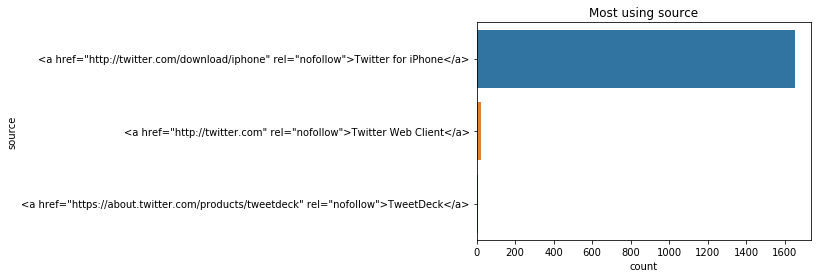

In [200]:
sns.countplot(data=df_twitter_archive,y='source')
plt.title('Most using source')
#from this countplot we can understand that most of the tweeter users are using 
#iphones for creating tweets

Text(0.5,1,'Top Ratings')

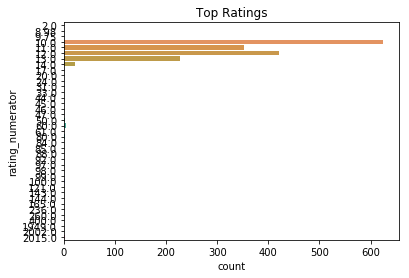

In [201]:

sns.countplot(data=df_twitter_archive,y='rating_numerator')
plt.title('Top Ratings')

Text(0.5,1,'Dog Predictions')

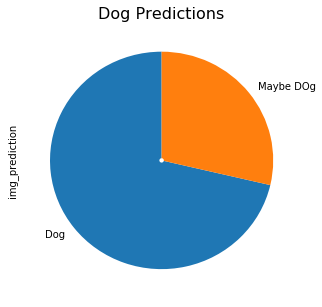

In [202]:
df_twitter_archive['img_prediction'].value_counts().plot(kind='pie',figsize=(5,5),startangle=90,wedgeprops={'width':0.98})
plt.title('Dog Predictions',fontsize=16)
#From this pie diagram we can understand which prediction is more

Text(0.5,1,'Dog Predictions')

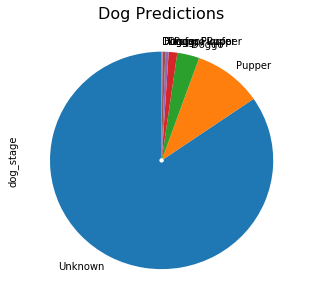

In [203]:
df_twitter_archive['dog_stage'].value_counts().plot(kind='pie',figsize=(5,5),startangle=90,wedgeprops={'width':0.98})
plt.title('Dog Predictions',fontsize=16)

Text(0,0.5,'Name')

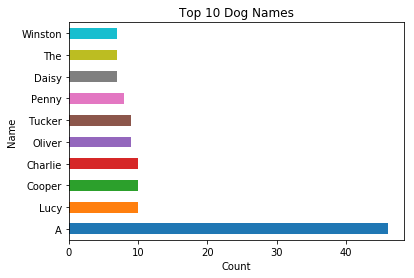

In [204]:
#for finding the top 10 breeds 
dog_names=df_twitter_archive.name.value_counts()[1:11].sort_values(axis=0,ascending=False)
dog_names.plot(kind='barh')
plt.title('Top 10 Dog Names')
plt.xlabel('Count')
plt.ylabel('Name')


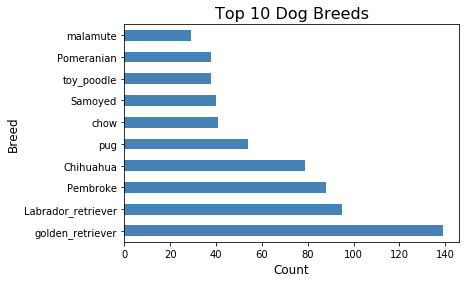

In [205]:

#for finding top 10 dog breeds
top_breeds=df_twitter_archive.p1.value_counts()[0:10].sort_values(axis=0,ascending=False)
top_breeds.plot(kind='barh',color=['steelblue'])
plt.title('Top 10 Dog Breeds',size=16)
plt.xlabel('Count',size=12)
plt.ylabel('Breed',size=12)
plt.savefig('top-breeds.png')